<a href="https://colab.research.google.com/github/AkashDEY172/Tiny-Planet/blob/master/COVID-19GeoSpatialAnalysisIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import folium
m=folium.Map(location=[22.8046,86.2029])
m

In [0]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [7]:
m1=folium.Map(width=550,height=350,location=[22.8046,86.2029],zoom_start=11,min_zoom=10,max_zoom=14)
fig.add_child(m1)
m1

In [9]:
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[22.8046,86.2029])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

## Plotting Markers on the map

### Folium provides a folium.Marker() class for plotting markers on map.
1.Pass the latitude and Longitude

2.Mention thepopup and tooltip

3. Add it to the map

### It is a two steps process

1. Create a base map on which markers will be placed

2. Add the markers to it

In [11]:
# Creating the base map
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[22.8046,86.2029], tiles='cartodbpositron', zoom_start=11)
fig3.add_child(m3)

# Adding markers to the map
folium.Marker(location=[22.8046,86.2029],popup='default popup Marker1', tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[22.834177,86.219185],popup='<strong>Marker3</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[22.796185, 86.171793],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
m3


In [13]:
# Creating Basemap

fig4=Figure(height=350,width=550)

m4=folium.Map(location=[22.8046,86.202],tiles='cartodbpositron',zoom_start=11)

fig4.add_child(m4)



# Adding Custom Markers

folium.Marker(location=[22.8046,86.2029],popup='Custom Marker 1',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='red',icon='none')).add_to(m4)

folium.Marker(location=[22.834177,86.219185],popup='Custom Marker 2',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='green',prefix='glyphicon',icon='off')).add_to(m4)

folium.Marker(location=[22.796185, 86.171793],popup='Custom Marker 3',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m4)

#folium.Marker(location=[28.4911091,77.0867361],popup='Custom Marker 4- <b>Analytics Vidhya</b>',tooltip='<strong>Click here to see Popup</strong>',icon=folium.features.CustomIcon('av.png',icon_size=(50,50))).add_to(m4)



m4

In [4]:
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-yuf42b6e
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-yuf42b6e
     |████████████████████████████████| 14.7MB 308kB/s 
     |████████████████████████████████| 10.9MB 46.9MB/s 
  Created wheel for geopandas: filename=geopandas-0.7.0+76.g72c57c0-py2.py3-none-any.whl size=959642 sha256=e46cf9b653a9352d27c99918f9d78a42a6c5aeaec6d585cdef14fd674a8458be
  Stored in directory: /tmp/pip-ephem-wheel-cache-62eu4p37/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


# Visualize COVID-19 affected states & UTs of India through time

In [0]:
import numpy as np

import pandas as pd



# For plotting maps

import folium



# For Regular Expressions

import re



# For working with geographical data

import geopandas as gpd



# For plotting in python

import matplotlib

import matplotlib.pyplot as plt

In [53]:
df_covid=pd.read_csv('/content/complete.csv')
df_covid.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
2911,2020-06-12,Telangana,18.1124,79.0193,4320,165,1993
2912,2020-06-12,Tripura,23.9408,91.9882,913,1,278
2913,2020-06-12,Uttar Pradesh,26.8467,80.9462,12088,345,7292
2914,2020-06-12,Uttarakhand,30.0668,79.0193,1643,15,842
2915,2020-06-12,West Bengal,22.9868,87.8550,9768,442,3988


In [54]:
india_geo=gpd.read_file('/content/india.json')
india_geo.head()

,id,district,dt_code,st_nm,st_code,year,geometry
0,None,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.94680 23.51363..."
1,None,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,None,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,None,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93456 22.55405, 92.93150 22.39458..."
4,None,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


In [55]:
india_geo['st_nm'].isnull().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
729    False
730    False
731    False
732    False
733    False
Name: st_nm, Length: 734, dtype: bool>

In [0]:
india_geo=india_geo.drop(columns=['id','district','dt_code','st_code','year'])

In [57]:
india_geo.head()

,st_nm,geometry
0,Mizoram,"POLYGON ((93.04466 23.41052, 92.94680 23.51363..."
1,Mizoram,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,Mizoram,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,Mizoram,"POLYGON ((92.93456 22.55405, 92.93150 22.39458..."
4,Mizoram,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


In [58]:
df_covid.dtypes

Date                          object
Name of State / UT            object
Latitude                     float64
Longitude                    float64
Total Confirmed cases          int64
Death                          int64
Cured/Discharged/Migrated      int64
dtype: object

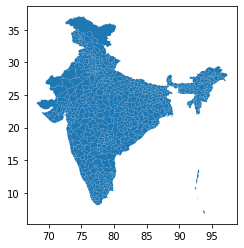

In [59]:
india_geo.plot()

In [60]:
india_geo.isnull().sum()

st_nm       0
geometry    0
dtype: int64

In [0]:

df_covid['Date']=pd.to_datetime(df_covid['Date']).apply(lambda x: x - pd.DateOffset(days=1))

In [62]:
df_covid.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
dtype: int64

In [63]:

df_covid['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Dadar Nagar Haveli',
       'Sikkim', 'Nagaland', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

In [0]:
df_covid['Name of State / UT']=df_covid['Name of State / UT'].apply(lambda x: re.sub('Union Territory of ','',x))

df_covid['Name of State / UT'].replace('Telengana','Telangana',inplace=True)

df_covid['Name of State / UT'].replace('Dadar Nagar Haveli','Dadra and Nagar Haveli',inplace=True)

In [65]:

df_covid['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Karnataka',
       'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli', 'Sikkim', 'Nagaland', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [0]:
id_dict={'Andaman and Nicobar Islands': '0',

 'Arunachal Pradesh': '1',

 'Assam': '2',

 'Bihar': '3',

 'Chandigarh': '4',

 'Chhattisgarh': '5',

 'Dadra and Nagar Haveli': '6',

 'Daman and Diu': '7',

 'Goa': '8',

 'Gujarat': '9',

 'Haryana': '10',

 'Himachal Pradesh': '11',

 'Jharkhand': '12',

 'Karnataka': '13',

 'Kerala': '14',

 'Lakshadweep': '15',

 'Madhya Pradesh': '16',

 'Maharashtra': '17',

 'Manipur': '18',

 'Meghalaya': '19',

 'Mizoram': '20',

 'Nagaland': '21',

 'Delhi': '22',

 'Puducherry': '23',

 'Punjab': '24',

 'Rajasthan': '25',

 'Sikkim': '26',

 'Tamil Nadu': '27',

 'Telangana': '28',

 'Tripura': '29',

 'Uttar Pradesh': '30',

 'Uttarakhand': '31',

 'West Bengal': '32',

 'Odisha': '33',

 'Andhra Pradesh': '34',

 'Jammu and Kashmir': '35',

 'Ladakh': '36'}

 

# Creating IDs using the above dictionary

df_covid['state_id']=df_covid['Name of State / UT'].map(id_dict)

In [0]:
df_covid['state_id']=df_covid['state_id'].fillna(" ")

In [68]:
df_covid['state_id'].isnull().sum()

0

In [69]:

df_covid['Active Cases']=df_covid['Total Confirmed cases']-(df_covid['Cured/Discharged/Migrated']+df_covid['Death'])

df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,state_id,Active Cases
0,2020-01-29,Kerala,10.8505,76.2711,1,0,0,14,1
1,2020-01-30,Kerala,10.8505,76.2711,1,0,0,14,1
2,2020-01-31,Kerala,10.8505,76.2711,2,0,0,14,2
3,2020-02-01,Kerala,10.8505,76.2711,3,0,0,14,3
4,2020-02-02,Kerala,10.8505,76.2711,3,0,0,14,3


In [70]:
bins=np.linspace(min(df_covid['Active Cases']),max(df_covid['Active Cases']),11)

bins

array([    0.,  4798.,  9596., 14394., 19192., 23990., 28788., 33586.,
       38384., 43182., 47980.])

In [0]:
# Coloring states and UTs with active COVID-19 cases

df_covid['color']=pd.cut(df_covid['Active Cases'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)

# Coloring states and UTs with no active cases but previously had

df_covid['color'].replace(np.nan,'#32CD32',inplace=True)

In [72]:
df_covid=df_covid[['Date','state_id','color']]

df_covid.head()

,Date,state_id,color
0,2020-01-29,14,#FFEBEB
1,2020-01-30,14,#FFEBEB
2,2020-01-31,14,#FFEBEB
3,2020-02-01,14,#FFEBEB
4,2020-02-02,14,#FFEBEB


In [0]:
for date in df_covid['Date'].unique():

    diff=set([str(i) for i in range(37)])-set(df_covid[df_covid['Date']==date]['state_id'])

    for i in diff:

      df_covid=pd.concat([df_covid,pd.DataFrame([[date,'#0073CF',i]],columns=['Date','color','state_id'])],ignore_index=True)

df_covid.sort_values('Date',inplace=True)

In [74]:
df_covid.sort_values('Date')

,Date,state_id,color
0,2020-01-29,14,#FFEBEB
2945,2020-01-29,13,#0073CF
2946,2020-01-29,32,#0073CF
2947,2020-01-29,23,#0073CF
2948,2020-01-29,25,#0073CF
...,...,...,...
2909,2020-06-11,26,#FFEBEB
2910,2020-06-11,27,#EBA1A8
2911,2020-06-11,28,#FFEBEB
2904,2020-06-11,21,#FFEBEB


In [0]:
df_covid['Date']=(df_covid['Date'].astype(int)// 10**9).astype('U10')

covid_dict={}

for i in df_covid['state_id'].unique():

    covid_dict[i]={}

    for j in df_covid[df_covid['state_id']==i].set_index(['state_id']).values:   

        covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

In [76]:

list(covid_dict.items())[10]

('34',
 {'1580256000': {'color': '#0073CF', 'opacity': 0.7},
  '1580342400': {'color': '#0073CF', 'opacity': 0.7},
  '1580428800': {'color': '#0073CF', 'opacity': 0.7},
  '1580515200': {'color': '#0073CF', 'opacity': 0.7},
  '1580601600': {'color': '#0073CF', 'opacity': 0.7},
  '1580688000': {'color': '#0073CF', 'opacity': 0.7},
  '1580774400': {'color': '#0073CF', 'opacity': 0.7},
  '1580860800': {'color': '#0073CF', 'opacity': 0.7},
  '1580947200': {'color': '#0073CF', 'opacity': 0.7},
  '1581033600': {'color': '#0073CF', 'opacity': 0.7},
  '1581120000': {'color': '#0073CF', 'opacity': 0.7},
  '1581206400': {'color': '#0073CF', 'opacity': 0.7},
  '1581292800': {'color': '#0073CF', 'opacity': 0.7},
  '1581379200': {'color': '#0073CF', 'opacity': 0.7},
  '1581465600': {'color': '#0073CF', 'opacity': 0.7},
  '1581552000': {'color': '#0073CF', 'opacity': 0.7},
  '1581638400': {'color': '#0073CF', 'opacity': 0.7},
  '1581724800': {'color': '#0073CF', 'opacity': 0.7},
  '1581811200': {'col

In [77]:
india_geo['state_id']=india_geo['st_nm'].map(id_dict)

india_geo.drop(columns='st_nm',inplace=True)


india_geo.head()

,geometry,state_id
0,"POLYGON ((93.04466 23.41052, 92.94680 23.51363...",20
1,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...",20
2,"POLYGON ((92.89633 24.39072, 92.86116 24.31374...",20
3,"POLYGON ((92.93456 22.55405, 92.93150 22.39458...",20
4,"POLYGON ((92.67307 23.38303, 92.68989 23.32804...",20


In [0]:
from folium.plugins import TimeSliderChoropleth

In [79]:
fig6=Figure(height=850,width=1000)

m6 = folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)

fig6.add_child(m6)

In [81]:
g = TimeSliderChoropleth(

    india_geo.set_index('state_id').to_json(),

    styledict=covid_dict

).add_to(m6)

m6